In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_df = pd.merge(city_df,ride_df,how="inner",on = "city")
# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [20]:
cities = combined_df["city"].unique()
num_cities = len(cities)
grouped_df = combined_df.groupby("city")

total_rev_per_city = grouped_df["fare"].sum()
num_rides_per_city = grouped_df["ride_id"].count()
avg_fare_per_city = total_rev_per_city/num_rides_per_city
total_num_drivers = grouped_df["driver_count"].sum()/num_rides_per_city
num_drivers = total_num_drivers.head(1)
type_city = grouped_df["type"]

df_new = combined_df.drop_duplicates("city")
df_new = df_new.sort_values("city")
d_c = df_new["driver_count"]
type_ = np.array(df_new["type"])

df = pd.DataFrame({
    "Number of Rides per City":num_rides_per_city, "Avg Fare per City":avg_fare_per_city,
    "Number of Drivers per City": total_num_drivers, "City Type" : type_
},columns = ["Number of Rides per City","Avg Fare per City","Number of Drivers per City","City Type"])
df["Avg Fare per City"] = df["Avg Fare per City"].astype(float).map("${:.2f}".format)
df["Number of Drivers per City"] = df["Number of Drivers per City"].astype(int)

df.head()
newer = combined_df.set_index('city')
df.head()

,Number of Rides per City,Avg Fare per City,Number of Drivers per City,City Type
city,,,,
Amandaburgh,18,$24.64,12,Urban
Barajasview,22,$25.33,26,Urban
Barronchester,16,$36.42,11,Suburban
Bethanyland,18,$32.96,22,Suburban
Bradshawfurt,10,$40.06,7,Rural


## Bubble Plot of Ride Sharing Data

24.499121716787844
30.737298033475952
34.63776503126503


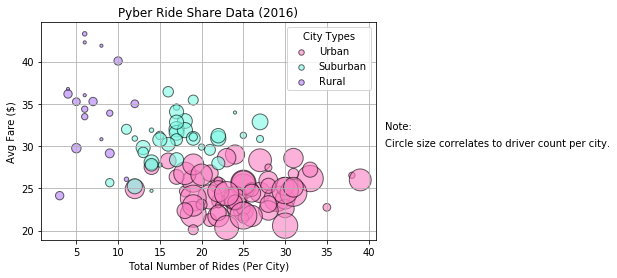

In [19]:
# Obtain the x and y coordinates for each of the three city types
cond1 = df["City Type"] =="Urban"
urban = df.loc[cond1]
cond2 = df["City Type"] =="Suburban"
sub = df.loc[cond2]
cond3 = df["City Type"] =="Rural"
rural = df.loc[cond3]
x1 = np.array(urban["Number of Rides per City"])
x2 = np.array(sub["Number of Rides per City"])
x3 = np.array(rural["Number of Rides per City"])
cond1_1 = df["City Type"] == "Urban"
cond2_2 = df["City Type"] == "Suburban"
cond3_3 = df["City Type"] == "Rural"
urban_2 = df.loc[cond1_1]
sub_2 = df.loc[cond2_2]
rural_2 = df.loc[cond3_3]
y1 = np.array(urban_2["Avg Fare per City"])
y2 = np.array(sub_2["Avg Fare per City"])
y3 = np.array(rural_2["Avg Fare per City"])
print(y1.mean())
print(y2.mean())
print(y3.mean())
x = [x1,x2,x3]
y = [y1,y2,y3]
# Build the scatter plots for each city types

plt.scatter(x1,y1,s = 10*urban["Number of Drivers per City"],alpha = 0.6,linewidth = 1, edgecolors = 'black',color = '#FA7EC2',label = "Urban")
plt.scatter(x2,y2,s = 10*sub["Number of Drivers per City"],alpha = 0.6,linewidth = 1, edgecolors = 'black',color = '#7EFAE5',label = "Suburban")
plt.scatter(x3,y3,s = 10*rural["Number of Drivers per City"],alpha = 0.6,linewidth = 1, edgecolors = 'black',color = '#B37EFA',label = "Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avg Fare ($)")
plt.grid()
plt.title("Pyber Ride Share Data (2016)")
note = "Note:"
notes = "Circle size correlates to driver count per city."
plt.text(42,32,note)
plt.text(42,30,notes)
# Create a legend
legend = plt.legend(title = "City Types")
for i in range(len(legend.legendHandles)):
    legend.legendHandles[i]._sizes = [30]
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Bubble_plot.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

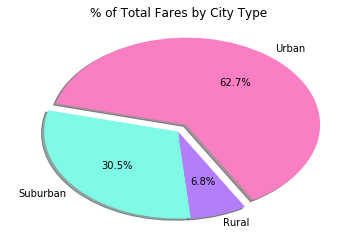

In [15]:
# Calculate Type Percents
cond11 = combined_df["type"] =="Urban"
urban1 = combined_df.loc[cond11]
cond22 = combined_df["type"] =="Suburban"
sub1 = combined_df.loc[cond22]
cond33 = combined_df["type"] =="Rural"
rural1 = combined_df.loc[cond33]
urban_fares = urban1["fare"].sum()
sub_fares = sub1["fare"].sum()
rural_fares = rural1["fare"].sum()

sizes = [urban_fares,sub_fares,rural_fares]
labels = ["Urban","Suburban","Rural"]
explode = (0.1,0,0)
colors = ['#FA7EC2','#7EFAE5','#B37EFA']
# Build Pie Chart
plt.pie(sizes,explode=explode,labels = labels, shadow = True, startangle = 300,autopct="%1.1f%%",colors = colors)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("%Total_Fares.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

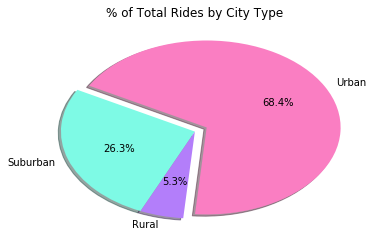

In [16]:
# Calculate Ride Percents
urban_rides = urban1["ride_id"].count()
sub_rides = sub1["ride_id"].count()
rural_rides = rural1["ride_id"].count()

sizes = [urban_rides,sub_rides,rural_rides]
# Build Pie Chart
plt.pie(sizes,explode=explode,labels = labels, shadow = True, startangle = 265,autopct="%1.1f%%",colors = colors)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("%Total_Rides.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

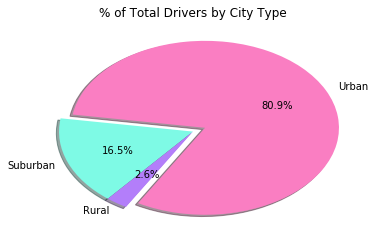

In [17]:
# Calculate Driver Percents
cond111 = df_new["type"] =="Urban"
urban11 = df_new.loc[cond111]
cond222 = df_new["type"] =="Suburban"
sub11 = df_new.loc[cond222]
cond333 = df_new["type"] =="Rural"
rural11 = df_new.loc[cond333]
urban_drivers = urban11["driver_count"].sum()
sub_drivers = sub11["driver_count"].sum()
rural_drivers = rural11["driver_count"].sum()

sizes = [urban_drivers,sub_drivers,rural_drivers]
# Build Pie Charts
plt.pie(sizes,explode=explode,labels = labels, shadow = True, startangle = 240,autopct="%1.1f%%",colors = colors)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("%Total_Drivers.png")

In [10]:
# Show Figure
plt.show()